# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [89]:
# import libraries here
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [9]:
# your answer here
temp = pd.read_csv(r'Temp_States.csv')

#### Print `temp`

In [10]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [16]:
# your answer here
# type(temp)
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [33]:
# your answer here
# SELECT temp.states FROM temp WHERE state == 'New York'
temp_ny = df[temp['State'] == 'New York']
temp_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [38]:
# your answer here
avg_temp_ny = stats.mean(temp_ny['Temperature'])
avg_temp_ny

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [39]:
# your answer here
plus_15 = df[temp['Temperature'] > 15]
plus_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [42]:
# your answer here
plus_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [55]:
# your answer here
# df.loc[(temp['Temperature']>15) & (temp['Temperature']<20)] 
df.loc[(temp['Temperature']>20) | (temp['Temperature']<15)]

,City,State,Temperature
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [72]:
# your answer here
print(temp.groupby('State')['Temperature'].mean())
print(temp.groupby('State')['Temperature'].std())

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64
State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [73]:
# your answer here
employee = pd.read_csv(r'employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [75]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

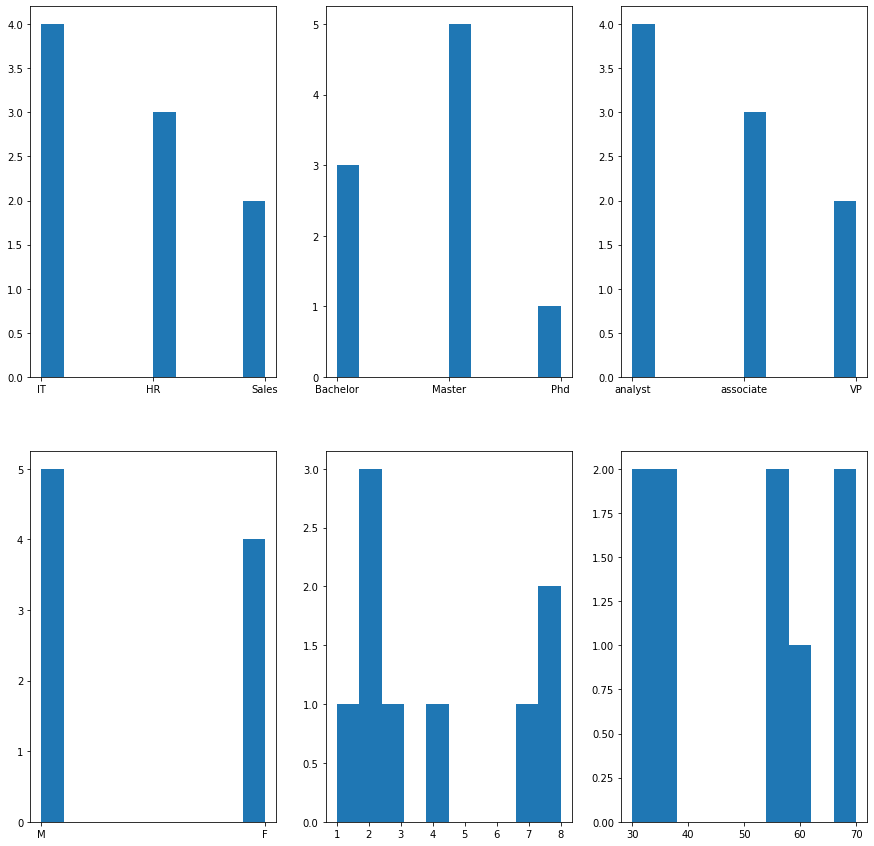

In [119]:
# your answer here
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

fig, axs = plt.subplots(2, 3, figsize=(15, 15))
axs[0][0].hist(employee.Department)
axs[0][1].hist(employee.Education)
axs[0][2].hist(employee.Title)
axs[1][0].hist(employee.Gender)
axs[1][1].hist(employee.Years)
axs[1][2].hist(employee.Salary)
#plt.figure(figsize=(15, 10), dpi=1000)
plt.show()

#### What's the average salary in this company?

In [122]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [123]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [124]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [138]:
# your answer here
employee.loc[employee['Salary'] == employee['Salary'].min(), 'Name']

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [153]:
# your answer here
# employee['Name'] == 'David'
employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [154]:
# your answer here
employee.loc[employee['Name'] == 'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [156]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [157]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [160]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [161]:
employee.loc[:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [164]:
# your answer here
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [169]:
# your answer here
# print(temp.groupby('State')['Temperature'].mean())
employee.groupby('Years')['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [170]:
# your answer here
employee.groupby('Title')['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd086f176d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd086f17c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd086f173d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd086f19250>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd086f19520>],
 'means': []}

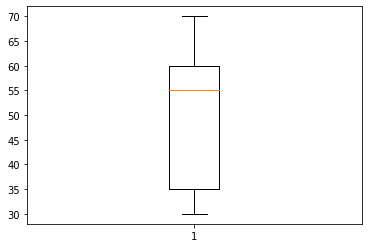

In [173]:
# draw boxplot here
plt.boxplot(employee.Salary)

In [181]:
# print first quartile here
np.quantile(employee.Salary, .25)

35.0

In [184]:
# print third quartile here
np.quantile(employee.Salary, .75)

60.0

#### Is the mean salary per gender different?

In [172]:
# your answer here
employee.groupby('Gender')['Salary'].mean()

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [185]:
# your answer here
print(employee.groupby('Department')['Salary'].mean())
print(employee.groupby('Department')['Years'].mean())
print(employee.groupby('Department')['Salary'].min())
print(employee.groupby('Department')['Years'].min())
print(employee.groupby('Department')['Salary'].max())
print(employee.groupby('Department')['Years'].max())

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64
Department
HR       4.666667
IT       4.500000
Sales    2.500000
Name: Years, dtype: float64
Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64
Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64
Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64
Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [186]:
# your answer here
employee.groupby('Department')['Salary'].max() - employee.groupby('Department')['Salary'].min()

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

In [187]:
employee.groupby('Department')['Salary'].min()

Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64

In [188]:
employee.groupby('Department')['Salary'].max()

Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [193]:
# your answer here
orders = pd.read_csv('Orders.csv')
orders

FileNotFoundError: [Errno 2] No such file or directory: 'Orders.csv'

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here
orders.dtypes

In [ ]:
# your answer here
orders.describe()

####  What is the average Purchase Price?

In [ ]:
# your answer here
orders["amount_spent"].mean()

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here
orders["amount_spent"].max()

In [ ]:
# your answer here
orders["amount_spent"].min()

#### Select all the customers we have in Spain

In [ ]:
# your answer here
orders[orders["Country"]=="Spain"]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here
len(orders[orders["Country"]=="Spain"]["CustomerID"].unique())

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here
orders[orders["Quantity"]>50]

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here
orders[(orders["Country"]=="Spain")&(orders["Quantity"]>50)]

#### Select all free orders

In [ ]:
# your answer here
orders[(orders["amount_spent"]==0)]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here
orders[(orders["Description"].str.contains('lunch bag'))]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here
orders[(orders["Description"].str.contains('lunch bag'))&(orders["year"]==2011)]

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here
orders[orders["Country"]=="Spain"]["amount_spent"].value_counts()
plt.hist(orders[orders["Country"]=="Spain"]["amount_spent"], bins=np.linspace(0,100,10))

#### Select all orders made in the month of August

In [ ]:
# your answer here
orders[orders["month"]==8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here
orders[orders["month"]==8]["Country"].value_counts()

#### What's the  average amount of money spent by country

In [ ]:
# your answer here
orders.groupby("Country").agg({"amount_spent":"mean"})

#### What's the most expensive item?

In [ ]:
# your answer here
orders[orders["UnitPrice"]==orders["UnitPrice"].max()]["Description"].values[0]

#### What was the average amount spent per year ?

In [ ]:
# your answer here
orders.groupby("year").agg({"amount_spent":"mean"})